In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import pydot
import graphviz


from sklearn.model_selection import train_test_split

C:\Users\mdebo\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\mdebo\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\mdebo\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\mdebo\anaconda3\envs\PythonData\lib\site-packages

In [2]:
data_path = 'data'

In [3]:
# check the training file: 
train_read = pd.read_csv(data_path + '/training.csv', sep=',')
print ('training data shape; ', train_read.shape)

training data shape;  (7049, 31)


In [4]:
train_read.head(3).T

,0,1,2
left_eye_center_x,66.0336,64.3329,65.0571
left_eye_center_y,39.0023,34.9701,34.9096
right_eye_center_x,30.227,29.9493,30.9038
right_eye_center_y,36.4217,33.4487,34.9096
left_eye_inner_corner_x,59.5821,58.8562,59.412
left_eye_inner_corner_y,39.6474,35.2743,36.321
left_eye_outer_corner_x,73.1303,70.7227,70.9844
left_eye_outer_corner_y,39.97,36.1872,36.321
right_eye_inner_corner_x,36.3566,36.0347,37.6781
right_eye_inner_corner_y,37.3894,34.3615,36.321


In [5]:
# check for null values in the training data: 

print ('nan in every cols: ', train_read.isna().sum())

nan in every cols:  left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x   

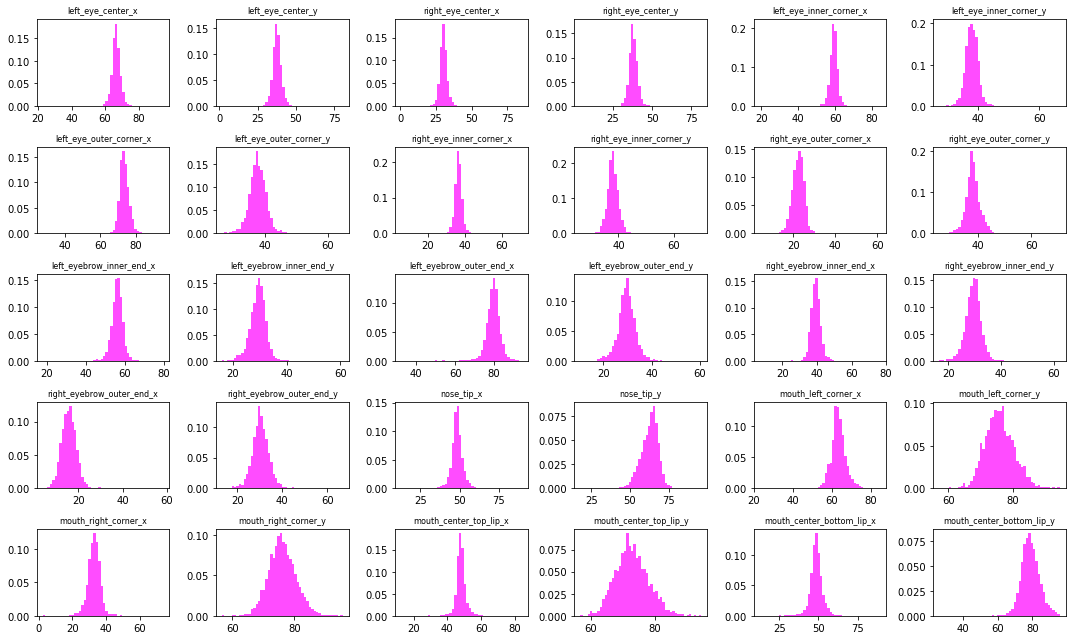

In [6]:
fig, axes = plt.subplots(5, 6, figsize=(15, 9))
ax = axes.ravel() 
for i in range(30):
  ax[i].hist(train_read[train_read.columns[i]], bins=50, density=True, alpha=0.7, color='magenta')
  ax[i].set_title(train_read.columns[i],fontsize=8)
  # ax[i].axes.get_xaxis().set_visible(False)
plt.tight_layout()  
plt.savefig(data_path + 'points_dist.png', dpi=200)

In [7]:
train_clean = train_read.dropna(axis=0, how='any', inplace=False)
train_clean = train_clean.reset_index(drop=True)

In [8]:
print ('data-frame shape with no null values: ', train_clean.shape)
print ('data-frame colummn names; ', train_clean.columns)

data-frame shape with no null values:  (2140, 31)
data-frame colummn names;  Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y', 'Image'],
      dtype='object')


In [9]:
# train_read[['Image']].head(2)
all_imgs = []
print (train_read[['Image']].shape)
for i in range(0, 7049):
    # split the pixel values based on the space
    x = train_read['Image'][i].split(' ')
    # create the listed pixels
    x = [y for y in x]
    all_imgs.append(x)

# arrays are always better than lists
all_imgs_arr = np.array(all_imgs, dtype='float') 

(7049, 1)


In [10]:
# train_clean[['Image']].head(2)
clean_imgs = []
# print (train_clean[['Image']].shape)
for i in range(0, len(train_clean)):
    # split the pixel values based on the space
    x_c = train_clean['Image'][i].split(' ')
    # create the listed pixels
    x_c = [y for y in x_c]
    clean_imgs.append(x_c)
    
# arrays are always better than lists
clean_imgs_arr = np.array(clean_imgs, dtype='float') 

In [11]:
clean_imgs_arr = np.reshape(clean_imgs_arr, (train_clean.shape[0], 96, 96, 1))
train_ims_clean = clean_imgs_arr/255.

# plt.imshow(all_imgs_arr[10].reshape(96, 96), cmap='gray')

In [12]:
clean_keypoints_df = train_clean.drop('Image', axis=1)
print ('check shape after dropping Image col in clean df: ', clean_keypoints_df.shape)

clean_keypoints_arr = clean_keypoints_df.to_numpy()
print ('check shape of clean keypoints arr: ', clean_keypoints_arr.shape)

check shape after dropping Image col in clean df:  (2140, 30)
check shape of clean keypoints arr:  (2140, 30)


In [13]:
# fig, ax = plt.subplots(figsize=(5, 4))
def vis_im_keypoint(img, points, axs):
  # fig = plt.figure(figsize=(6, 4))
  axs.imshow(img.reshape(96, 96))
  # points should be in the standardized 
  xcoords = 48* (points[0::2] + 1.)
  ycoords = 48* (points[1::2] + 1.) 
  axs.scatter(xcoords, ycoords, color='red', marker='o')

# vis_im_keypoint(train_ims[5], train_points_arr[5], ax)  

# same function as before but deals with keypoints when they are not standardized
def vis_im_keypoint_notstandard(img, points, axs): 
  # fig = plt.figure(figsize=(6, 4))
  axs.imshow(img.reshape(96, 96))
  xcoords = (points[0::2] + 0.)
  ycoords = (points[1::2] + 0.) 
  axs.scatter(xcoords, ycoords, color='red', marker='o')

In [14]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, \
     Flatten, BatchNormalization, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.activations import elu, relu
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
# from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2 as L2

In [15]:
class customCallbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    self.epoch = epoch + 1
    if self.epoch % 50 == 0:
      print ('epoch num {}, train acc: {}, validation acc: {}'.format(epoch, logs['mae'], logs['val_mae']))


learning_rate = 1e-3

def lrdecay(epoch):
  lr = learning_rate
  if epoch > 1600:
    lr *= 1e-1
  elif epoch > 800:
    lr *= 3e-1
  elif epoch > 400:
    lr *= 5e-1
  elif epoch > 200:
    lr *= 7e-1
  elif epoch > 100:
    lr *= 9e-1
  if epoch % 50 == 0:    
    print('Learning rate: ', lr)    
  return lr


def lrexpdecay(epoch):
  decay = 0.1
  lr = learning_rate*(np.exp(-decay*epoch))
  return lr


def earlystop(mode):
  if mode=='acc':
    estop = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=20, mode='max')
  elif mode=='loss':
    estop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, mode='min')
  return estop



reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_mae', factor=0.8,
                              patience=25, min_lr=1e-5, verbose=1)



  # if epoch < 40:
  #   return 0.01
  # else:
  #   return 0.01 * np.math.exp(0.03 * (40 - epoch))

lrdecay = tf.keras.callbacks.LearningRateScheduler(lrdecay) # learning rate decay

sgd = SGD(lr=learning_rate, momentum = 0.9,nesterov=True)
adam = Adam(learning_rate=learning_rate)

In [16]:
def flip_im_points1(img, points):
  flip_im = np.fliplr(img)
  xcoords = points[0::2]
  ycoords = points[1::2]
  new_points = []
  for i in range(len(xcoords)):
    xp = xcoords[i]
    yp = ycoords[i]
    new_points.append(xp*(-1))
    new_points.append(yp)
  return flip_im, np.asarray(new_points)  

# flip keypoints when they are not standardized 
def flip_im_points0(img, points): 
  flip_im = np.fliplr(img)
  xcoords = points[0::2]
  ycoords = points[1::2]
  new_points = []
  for i in range(len(xcoords)):
    xp = xcoords[i]
    yp = ycoords[i]
    new_points.append(96-xp)
    new_points.append(yp)
  return flip_im, np.asarray(new_points)    

In [17]:
import imgaug as ia
import imgaug.augmenters as iaa

def gnoise_lincontrast(im_tr, pt_tr):
  seq = iaa.Sequential([iaa.LinearContrast((0.6, 1.5)), 
                        iaa.Sometimes(
        0.80, iaa.GaussianBlur(sigma=(0., 2.0)))])
  aug_ims = []
  aug_pts = []
  for im, pt in zip(im_tr, pt_tr):
    #f_im, f_pts = flip_im_points1(im, pt)
    f_im = seq(image=im)
    aug_ims.append(im)
    aug_ims.append(f_im)
    aug_pts.append(pt)
    aug_pts.append(pt)
  return np.asarray(aug_ims), np.asarray(aug_pts)

In [18]:
aug_ims_train_clean_g, aug_points_train_clean_g = gnoise_lincontrast(train_ims_clean, clean_keypoints_arr)
print (type(aug_ims_train_clean_g), aug_ims_train_clean_g.shape, aug_points_train_clean_g.shape)

<class 'numpy.ndarray'> (4280, 96, 96, 1) (4280, 30)


C:\Users\mdebo\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  import sys


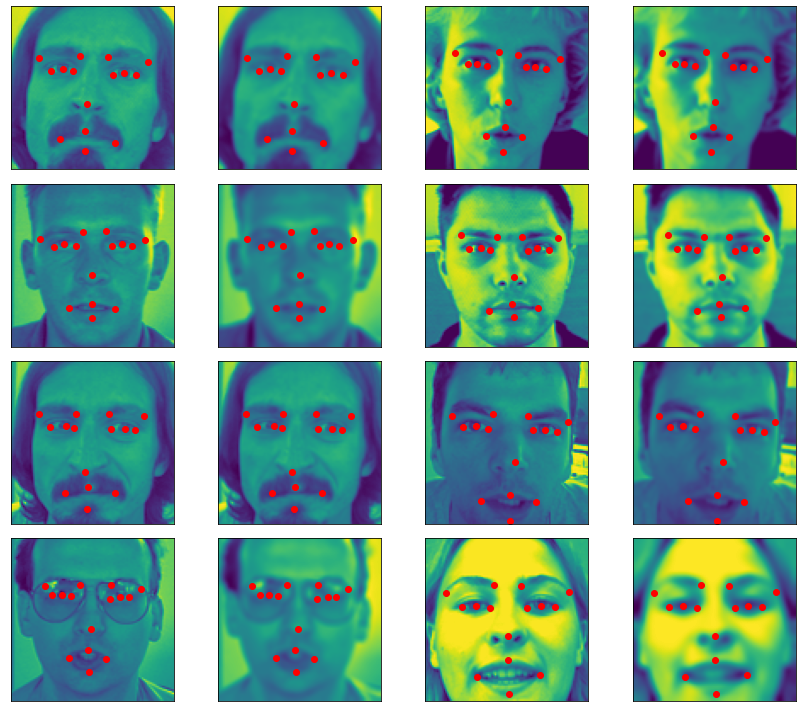

In [19]:
fig = plt.figure(figsize=(12, 10))
npics= 16
count = 1
for i in range(npics):
  ipic = i # use this to see original and augmented image side by side
#   ipic = np.random.choice(aug_ims_train_clean.shape[0])
  ax = fig.add_subplot(npics/4 , 4, count, xticks=[],yticks=[])
  vis_im_keypoint_notstandard(aug_ims_train_clean_g[ipic], aug_points_train_clean_g[ipic], ax)
  count = count + 1

# plt.title('Gaussian Blur and Linear Contrast')
plt.tight_layout()
plt.savefig(data_path+'/aug_ims_kps_gauss_cont.png', dpi=200)

plt.show()    

In [20]:
# include rotation augmentation 

from imgaug.augmentables import Keypoint, KeypointsOnImage

def rotate_aug(im_tr, pt_tr):
  seq = iaa.Sequential([iaa.Affine(rotate=15, scale=(0.8, 1.2))])
  #image_aug, kps_aug = seq(image=image, keypoints=kps)
  aug_ims = []
  aug_pts = []
  coordlist = []
  for im, pt in zip(im_tr, pt_tr):
    #f_im, f_pts = flip_im_points1(im, pt)
    xcoord = pt[0::2]
    ycoord = pt[1::2]
    for i in range(len(xcoord)): 
      coordlist.append(Keypoint(xcoord[i], ycoord[i]))
    kps = KeypointsOnImage(coordlist, shape=im.shape)  
    f_im, f_kp = seq(image=im, keypoints=kps)
    #new_xcoords = []
    #new_ycoords = []
    all_coords = []
    for k in range(len(kps.keypoints)):
      before = kps.keypoints[k]
      after = f_kp.keypoints[k]
      # print("Keypoint %d: (%.8f, %.8f) -> (%.8f, %.8f)" % (
      #     i, before.x, before.y, after.x, after.y)
      # )
      all_coords.append(after.x)
      all_coords.append(after.y)
      all_coords_arr = np.asarray(all_coords)
    aug_ims.append(im)
    aug_ims.append(f_im)
    aug_pts.append(pt)
    aug_pts.append(all_coords)
    coordlist.clear()
  return np.asarray(aug_ims), np.asarray(aug_pts)

In [21]:
aug_ims_train_clean_g2, aug_points_train_clean_g2 = rotate_aug(aug_ims_train_clean_g, aug_points_train_clean_g)

print (type(aug_ims_train_clean_g2), aug_ims_train_clean_g2.shape, aug_points_train_clean_g2.shape)

<class 'numpy.ndarray'> (8560, 96, 96, 1) (8560, 30)


C:\Users\mdebo\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  import sys


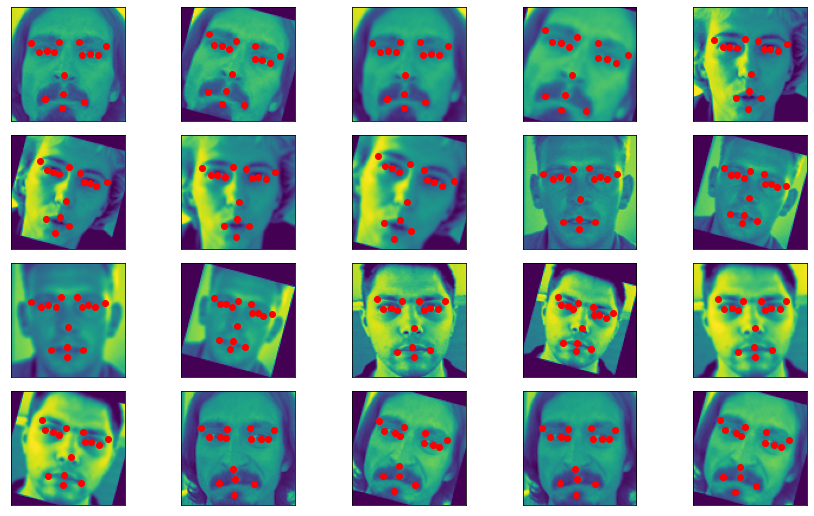

In [22]:
fig = plt.figure(figsize=(12, 9))
npics= 20
count = 1
for i in range(npics):
  ipic = i # use this to see original and augmented image side by side
#   ipic = np.random.choice(aug_ims_train_clean.shape[0])
  ax = fig.add_subplot(npics/4 , 5, count, xticks=[],yticks=[])
  vis_im_keypoint_notstandard(aug_ims_train_clean_g2[ipic], aug_points_train_clean_g2[ipic], ax)
  count = count + 1


plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.tight_layout()

plt.tight_layout()
plt.savefig(data_path+'/aug_ims_kps_rot_scale.png', dpi=200, bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [23]:
### add the flipped images in the training data-set
def aug_flip(im_tr, pt_tr):
  aug_ims = []
  aug_pts = []
  for im, pt in zip(im_tr, pt_tr):
    f_im, f_pts = flip_im_points1(im, pt)
    aug_ims.append(im)
    aug_ims.append(f_im)
    aug_pts.append(pt)
    aug_pts.append(f_pts)
  return np.asarray(aug_ims), np.asarray(aug_pts)

def aug_flip0(im_tr, pt_tr):
  aug_ims = []
  aug_pts = []
  for im, pt in zip(im_tr, pt_tr):
    f_im, f_pts = flip_im_points0(im, pt)
    aug_ims.append(im)
    aug_ims.append(f_im)
    aug_pts.append(pt)
    aug_pts.append(f_pts)
  return np.asarray(aug_ims), np.asarray(aug_pts)

In [24]:
aug_ims_train_clean_g3, aug_points_train_clean_g3 = aug_flip0(aug_ims_train_clean_g2, 
                                                         aug_points_train_clean_g2)

print ('size of training data now: ', aug_ims_train_clean_g3.shape, aug_points_train_clean_g3.shape)

size of training data now:  (17120, 96, 96, 1) (17120, 30)


C:\Users\mdebo\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  import sys


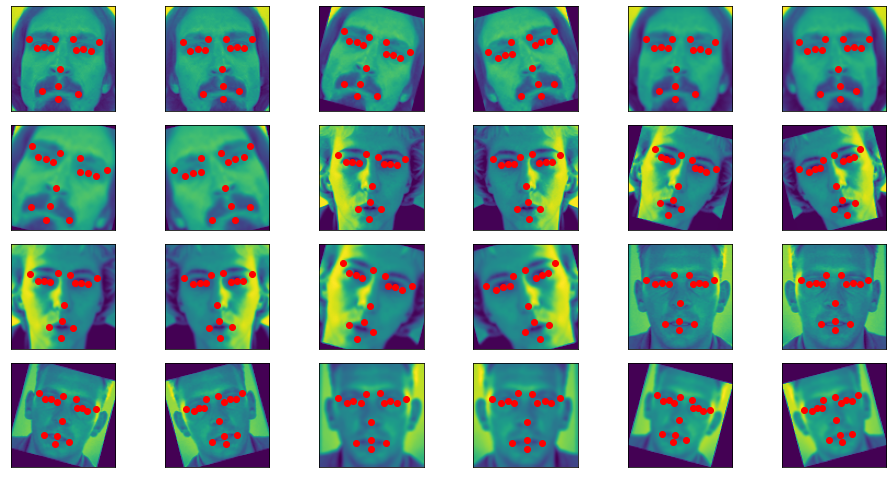

In [25]:
fig = plt.figure(figsize=(13, 10))
npics= 24
count = 1
for i in range(npics):
  ipic = i # use this to see original and augmented image side by side
#   ipic = np.random.choice(aug_ims_train_clean.shape[0])
  ax = fig.add_subplot(npics/4 , 6, count, xticks=[],yticks=[])
  vis_im_keypoint_notstandard(aug_ims_train_clean_g3[ipic], aug_points_train_clean_g3[ipic], ax)
  count = count + 1




plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.tight_layout()

plt.savefig(data_path+'/aug_ims_kps_flip_h.png', bbox_inches = 'tight', pad_inches = 0, dpi=200)
plt.show()

C:\Users\mdebo\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  import sys


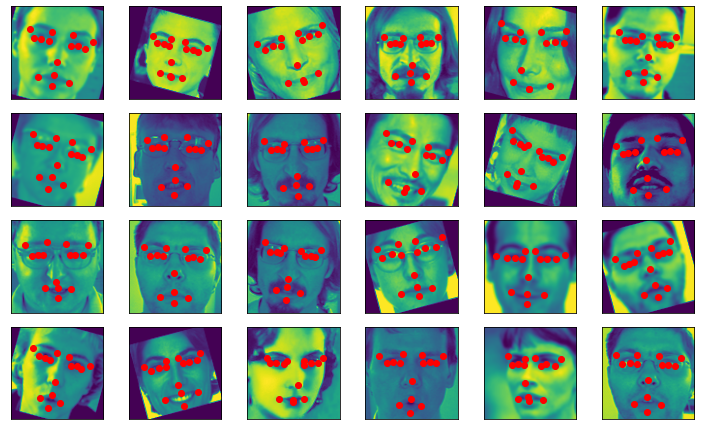

In [26]:
fig = plt.figure(figsize=(10, 9))
npics= 24
count = 1
for i in range(npics):
  #ipic = i # use this to see original and augmented image side by side
  ipic = np.random.choice(aug_ims_train_clean_g3.shape[0])
  ax = fig.add_subplot(npics/4 , 6, count, xticks=[],yticks=[])
  vis_im_keypoint_notstandard(aug_ims_train_clean_g3[ipic], aug_points_train_clean_g3[ipic], ax)
  count = count + 1


plt.tight_layout()
plt.show()

In [27]:
from sklearn.utils import shuffle
aug_ims_train_final, aug_points_train_final = shuffle(aug_ims_train_clean_g3, aug_points_train_clean_g3)
print ('check number of training files: ', len(aug_points_train_final))

check number of training files:  17120


In [28]:
### let's try to predict some keypoints on the test data-set
test_read = pd.read_csv(data_path + '/test.csv', sep=',')
print ('test dataframe shape; ', test_read.shape)
test_read.head(3)

test dataframe shape;  (1783, 2)


,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...


In [29]:
test_ims = []

for i in range(0, 1783):
  x_t = test_read['Image'][i].split(' ') # split the pixel values based on the space 
  x_t = [y for y in x_t] # create the listed pixels
  test_ims.append(x_t)
test_imgs_arr = np.array(test_ims, dtype='float') # arrays are always better than lists

test_imgs_arr = np.reshape(test_imgs_arr, (1783, 96, 96, 1))
test_ims = test_imgs_arr/255.

In [30]:
def inception_like(input_layer, filter1, filter2, filter3):
  # 1x1 conv
  conv1 = Conv2D(filter1, (1,1), padding='same', activation='relu')(input_layer)
  bn1 = BatchNormalization()(conv1)
  # 3x3 conv
  conv3 = Conv2D(filter2, (3,3), padding='same', activation='relu')(input_layer)
  bn3 = BatchNormalization()(conv3)
  # 5x5 conv
  conv5 = Conv2D(filter3, (5,5), padding='same', activation='relu')(input_layer)
  bn5 = BatchNormalization()(conv5)
  # 3x3 max pooling
#   pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(input_layer)
  pool = MaxPooling2D((2,2), strides=(1,1), padding='same')(input_layer)
  # concatenate filters, assumes filters/channels last
  layer_out = Concatenate(axis=-1)([bn3, bn5, pool])
  return layer_out

In [31]:
input_im = Input(shape=(96, 96, 1))
def modeL2():
#   x = Conv2D(64, (3, 3), padding='same', strides=(2, 2), activation='relu', )(input_im)
#   x = MaxPooling2D((3, 3), padding='same', strides=(2, 2), )(x)
#   x = Conv2D(64, (1, 1), padding='same', strides=(1, 1), activation='relu', )(x)
# #   x =  Conv2D(64, (3, 3), padding='same', strides=(1, 1), activation='relu', )(x) 
#   x = Conv2D(96, (3, 3), padding='same', strides=(1, 1), activation='relu', )(x)
#   x = MaxPooling2D((3, 3), padding='same', strides=(2, 2) )(x)
#   x = Conv2D(16, (3, 3), padding='same', activation='relu', )(input_im)
#   x = Conv2D(32, (3, 3), padding='same', activation='relu', )(input_im)  
#   x = Conv2D(64, (3, 3), padding='same', activation='relu', )(x)  
  x1 = inception_like(input_im, 64, 64, 32)
  x1 = MaxPooling2D((3, 3), padding='same', strides=(2, 2) )(x1)

  x2 = inception_like(x1, 64, 64, 32)
  x2 = MaxPooling2D((3, 3), padding='same', strides=(2, 2) )(x2)
  
  x2_1 = inception_like(x2, 96, 96, 64)
  x2_1 = MaxPooling2D((3, 3), padding='same', strides=(2, 2) )(x2_1)  

  x3 = inception_like(x2_1, 96, 128, 64)
  #x3 = MaxPooling2D((3, 3), padding='same', strides=(2, 2) )(x3)
  x3 = MaxPooling2D()(x3)

  x3_1 = inception_like(x3, 128, 256, 128)
  #x3_1 = MaxPooling2D((3, 3), padding='same', strides=(2, 2) )(x3_1) 
  x3_1 = GlobalAveragePooling2D()(x3_1)

  x4 = Flatten()(x3_1)
  x4 = Dense(1024, kernel_regularizer=L2(0.03))(x4)
  x4 = Dropout(0.2)(x4)

  #x5 = Dense(128, kernel_regularizer=l2(l2=0.02))(x4)
  #x5 = Dropout(0.1)(x5)

  pred = Dense(30)(x4)
  model = Model(inputs=input_im, outputs=pred, name='Inception_Like')

  return model

In [32]:
face_key_model2_aug = modeL2()
face_key_model2_aug.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "Inception_Like"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 96, 96, 64)   640         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 96, 96, 32)   832         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 96, 96, 64)   256         c

In [ ]:
# !pip install pydot
# !pip install graphviz

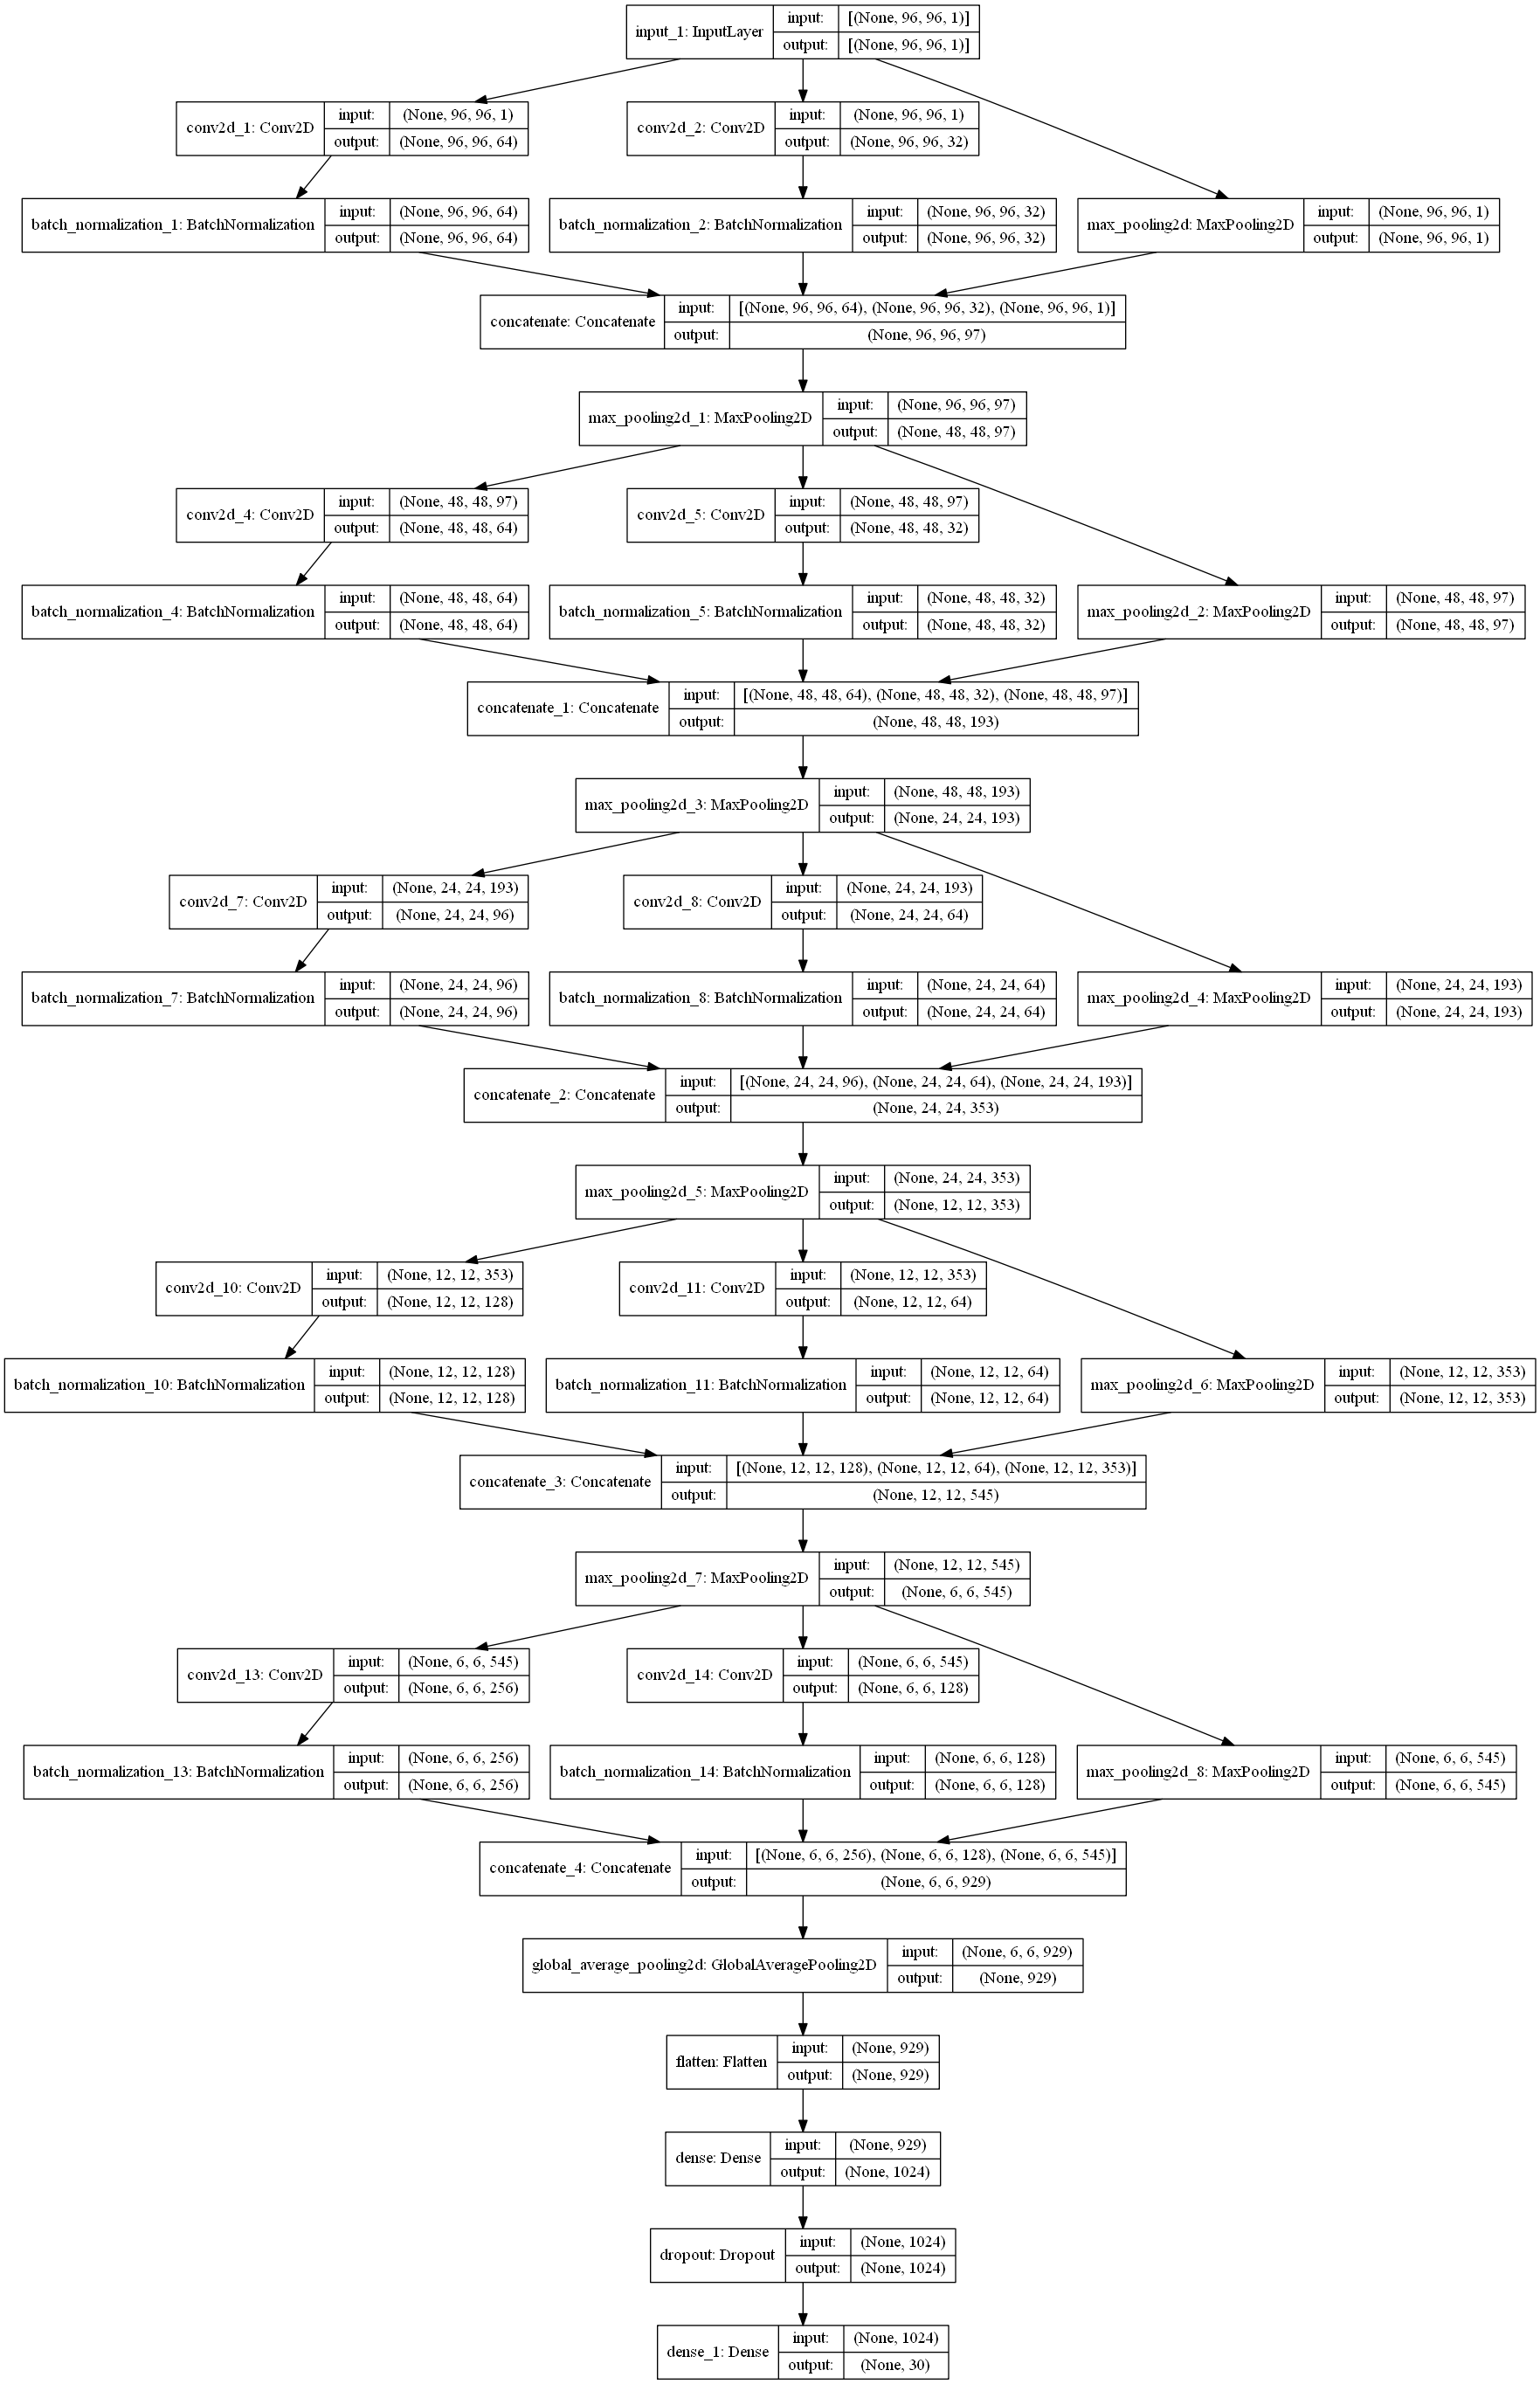

In [37]:
# , dpi=150
tf.keras.utils.plot_model(face_key_model2_aug, show_shapes=True, to_file=data_path + "/inception_like_model.png")

In [38]:
face_key_model2_aug.compile(loss='mse', 
                       optimizer=Adam(learning_rate=3e-3), 
                       metrics=['mae'])

In [39]:
face_key_model2_aug_train_clean = face_key_model2_aug.fit(aug_ims_train_final, aug_points_train_final, 
                                                  validation_split= 0.05, 
                                                  batch_size=64, epochs=300, 
                                                  callbacks=[customCallbacks(), reduce_lr], 
                                          verbose=0)

KeyboardInterrupt: 

In [ ]:
mae = face_key_model2_aug_train_clean.history['mae']
# mae = [i for i in mae if i<60]
print (type(mae))
val_mae = face_key_model2_aug_train_clean.history['val_mae']
# val_mae = [i for i in val_mae if i<60]

loss = face_key_model2_aug_train_clean.history['loss']
# loss = [i for i in loss if i<1200]
val_loss = face_key_model2_aug_train_clean.history['val_loss']
# val_loss = [i for i in val_loss if i<1200]

fig = plt.figure(figsize=(8, 4))

fig.add_subplot(121)
plt.plot(range(len(loss)), loss, linestyle='-', color='red', alpha=0.7, label='Train Loss')
plt.plot(range(len(val_loss)), val_loss, linestyle='-.', color='navy', alpha=0.7, label='Val Loss')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=13)
plt.yscale('log')
plt.legend(fontsize=12)

fig.add_subplot(122)
plt.plot(range(len(mae)), mae, linestyle='-', color='red', alpha=0.7, label='Train MAE')
plt.plot(range(len(val_mae)), val_mae, linestyle='-.', color='navy', alpha=0.7, label='Val MAE')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('MAE', fontsize=13)
plt.yscale('log')
plt.legend(fontsize=12)

plt.tight_layout()
plt.savefig(data_path+'train_loss_mae.png', dpi=150)
plt.show()

In [ ]:
predict_points_aug2_clean = face_key_model2_aug.predict(test_ims)

print ('check shape of predicted points: ', predict_points_aug2_clean.shape)

In [ ]:
fig = plt.figure(figsize=(10, 8))
npics= 12
count = 1
for i in range(npics):
  # ipic = i
  ipic = np.random.choice(test_ims.shape[0])
  ax = fig.add_subplot(npics/3 , 4, count, xticks=[],yticks=[])
  vis_im_keypoint_notstandard(test_ims[ipic], predict_points_aug2_clean[ipic], ax)
  count = count + 1


plt.tight_layout()
plt.savefig(data_path+'/prediction_keypoints.png', dpi=200, bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [ ]:
predict_points_aug2_s = predict_points_aug2_clean
print ('check max and min: ', predict_points_aug2_s.max(), predict_points_aug2_s.min())

In [ ]:
print ('check the new predict data frame: ', predict_points_aug2_s.shape)
predict_points_aug2_s[predict_points_aug2_s > 95.99] = 96.0
predict_points_aug2_s[predict_points_aug2_s < 0.0] = 0.0

print ('check max and min now: ', predict_points_aug2_s.max(), predict_points_aug2_s.min())

In [ ]:
test_predicts3 = pd.DataFrame(predict_points_aug2_s, columns = list(clean_keypoints_df.columns))

print ('check the new predict data frame: ', '\n')
test_predicts3.head(3)

In [ ]:
for i in range(lookup_table.shape[0]):
    lookup_table.Location[i] = test_predicts3.loc[lookup_table.ImageId[i]-1][lookup_table.FeatureName[i]]

In [ ]:
sub_form_table.Location = lookup_table.Location
new_submission = sub_form_table

In [ ]:
new_submission.head(3)